# Importing the Libraries

In [1]:
#importing main libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Importing the Dataset

In [2]:
#calling dataset
dataset = pd.read_csv('C:/Users/luann/Arquivos Datasets/churn.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Taking care of missing values

In [3]:
#checking if there are missing values
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
#There are not missing values

In [5]:
#now, checking percentage of clients in churn relative to total
print('A quantidade atual de usuários em churn é de', round(sum(dataset['Exited']==1)/dataset.shape[0]*100,2),'%')

A quantidade atual de usuários em churn é de 20.37 %


In [6]:
#calculating the amount of clients in churn with the relative active account time
Qtd_Exited = []
for i in range (0,11):
    Qtd_Exited.append(sum((dataset.Exited ==1) & (dataset.Tenure == i)))
Qtd_Exited

[95, 232, 201, 213, 203, 209, 196, 177, 197, 213, 101]

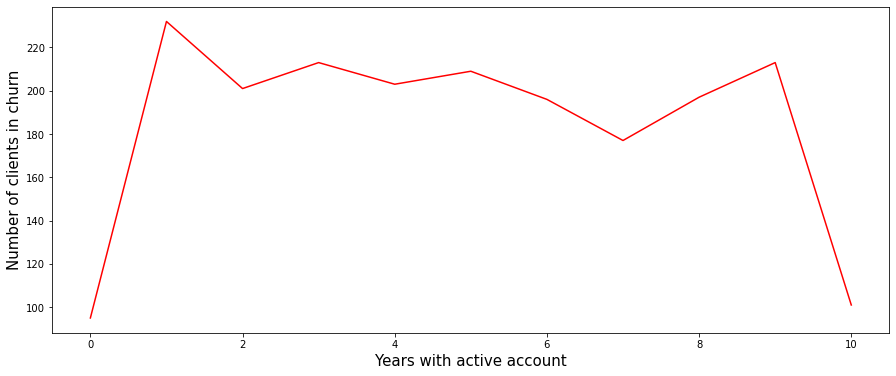

In [7]:
#ploting graph of clients in churn
plt.figure(figsize=(15,6))
plt.xlabel('Years with active account', size=15)
plt.ylabel('Number of clients in churn', size=15)
plt.plot(Qtd_Exited, color='red')

# Analysing impact of clients in churn

In [29]:
#another task is find out how much profit will be lost if all clients in churn cancel their account
#how profit is calculated:
##calculate the average salary of all clients
##every client generates a percentage of salary as profit to the bank
##clients with salary above average salary, generates 20% of their salary as profit 
##clients with salary below average salary, generates 15% of their salary as profit 

In [30]:
#calculating average salary
med_salarial = dataset['EstimatedSalary'].mean()

In [31]:
print('total profit generated by clients with salary above average',dataset[dataset['EstimatedSalary'] > med_salarial]['EstimatedSalary'].sum()*0.2)
print('total profit generated by clients with salary below average',dataset[dataset['EstimatedSalary'] < med_salarial]['EstimatedSalary'].sum()*0.15)
print('Actual Anual Profit for the Bank',dataset[dataset['EstimatedSalary'] > med_salarial]['EstimatedSalary'].sum()*0.2 +
     dataset[dataset['EstimatedSalary'] < med_salarial]['EstimatedSalary'].sum()*0.15)

total profit generated by clients with salary above average 149906870.71
total profit generated by clients with salary below average 37705206.789
Actual Anual Profit for the Bank 187612077.499


In [32]:
#now, calculating new average salary, without clients in churn
med_salarial_estimada = dataset[dataset['Exited']==0]['EstimatedSalary'].mean()
ds7 = dataset[dataset['Exited']==0]
ds8 = dataset[dataset['Exited']==1]

In [33]:
print('total profit generated by clients with salary above average after churn',ds7[ds7['EstimatedSalary'] >med_salarial_estimada]['EstimatedSalary'].sum()*0.2)
print('total profit generated by clients with salary below average after churn',ds7[ds7['EstimatedSalary'] <med_salarial_estimada]['EstimatedSalary'].sum()*0.15)
print('Anual Profit for the Bank after churn',ds7[ds7['EstimatedSalary'] >med_salarial_estimada]['EstimatedSalary'].sum()*0.2 +
ds7[ds7['EstimatedSalary'] <med_salarial_estimada]['EstimatedSalary'].sum()*0.15)
print('There will be a loss of',dataset[dataset['EstimatedSalary'] > med_salarial]['EstimatedSalary'].sum()*0.2 +
     dataset[dataset['EstimatedSalary'] < med_salarial]['EstimatedSalary'].sum()*0.15 -
   ds7[ds7['EstimatedSalary'] >med_salarial_estimada]['EstimatedSalary'].sum()*0.2 -
ds7[ds7['EstimatedSalary'] <med_salarial_estimada]['EstimatedSalary'].sum()*0.15  )

total profit generated by clients with salary above average after churn 118772614.826
total profit generated by clients with salary below average after churn 30053060.9325
Anual Profit for the Bank after churn 148825675.7585
There will be a loss of 38786401.7405


# Analysing which kind of clients in churn offers the best ROI in if the bank use a financial advantage 

In [ ]:
#as we saw in evaluation model, the two most important features for predicting class 0 or 1 is GBC were age and number of products
#therefore, each of them will be analysed in order to understand how they influenciate a client to be in churn

In [34]:
#checking number of products a client can obtain
dataset['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [35]:
#number of products of clients not in churn
list1 = []
for i in range (1,5):
    list1.append(sum(ds7['NumOfProducts']==i))
list1

In [37]:
#number of products of clients in churn
list2 = []
for i in range (1,5):
    list2.append(sum(ds8['NumOfProducts']==i))
list2

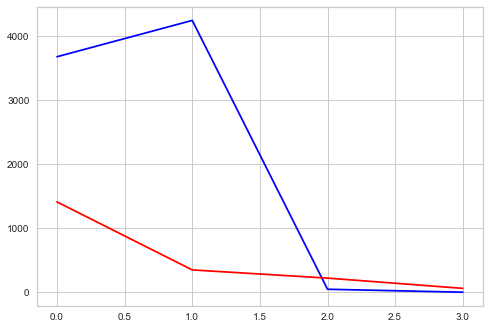

In [39]:
#plotting comparison
plt.plot(list1, c='blue')
plt.plot(list2, c='red')

In [40]:
#People who have many products (3 to 4) want to leave the bank, that is, having many products is not advantageous
#People who want to stay have few products (1 to 2)
#The people who most want to cancel account have 1 product

In [41]:
#checking number of clients not in churn, grouped by different ranges of age
list3 = []
list3.append(sum(ds7[(ds7['Age']>=18) & (ds7['Age']<=30)]['Age']))
list3.append(sum(ds7[(ds7['Age']>30) & (ds7['Age']<=40)]['Age']))
list3.append(sum(ds7[(ds7['Age']>40) & (ds7['Age']<=50)]['Age']))
list3.append(sum(ds7[(ds7['Age']>50) & (ds7['Age']<=60)]['Age']))
list3.append(sum(ds7[(ds7['Age']>60) & (ds7['Age']<=70)]['Age']))
list3.append(sum(ds7[(ds7['Age']>70) & (ds7['Age']<=80)]['Age']))

In [42]:
#checking number of clients in churn, grouped by different ranges of age
list4 = []
list4.append(sum(ds8[(ds8['Age']>=18) & (ds8['Age']<=30)]['Age']))
list4.append(sum(ds8[(ds8['Age']>30) & (ds8['Age']<=40)]['Age']))
list4.append(sum(ds8[(ds8['Age']>40) & (ds8['Age']<=50)]['Age']))
list4.append(sum(ds8[(ds8['Age']>50) & (ds8['Age']<=60)]['Age']))
list4.append(sum(ds8[(ds8['Age']>60) & (ds8['Age']<=70)]['Age']))
list4.append(sum(ds8[(ds8['Age']>70) & (ds8['Age']<=80)]['Age']))

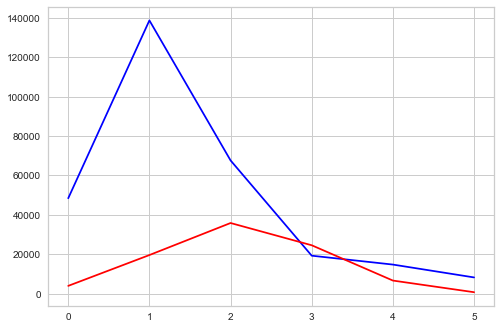

In [43]:
#plotting comparison
plt.plot(list3, c='blue')
plt.plot(list4, c='red')

In [44]:
#Most people who want to leave the bank are between 40 and 50 years old
#Therefore, the amount earmarked for financial incentive will result in a greater fixation of customers, if it is earmarked for people between 40 and 50 who have just opened a bank account (active years at the bank = 0)

# Predicting models

In [8]:
#pycaret will be used in order to analyse which algoritm is the best for classify this dataset
#OBS: probably due to the difference in amount of clients not in churn and clients in churn, algoritm will not predict correctly when a client is in churn
#therefore, it is necessary to balance train set, so algoritm will predict more precisely when a client is in churn. Otherwise, it will comprehend that in most cases, client is probably not in churn
#although just to show that a not balanced train set will harm predictions, I will balance later
from pycaret.classification import *
clf1 = setup(data = dataset, target = 'Exited',train_size=0.2, session_id=1, ignore_features=['RowNumber','CustomerId','Surname'] ,numeric_features=['Tenure','NumOfProducts'])

,Description,Value
0,session_id,1
1,Target,Exited
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(10000, 14)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
#comparing scores of different models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8580,0.8646,0.4501,0.7437,0.5571,0.4788,0.5022,0.0870
ada,Ada Boost Classifier,0.8560,0.8447,0.4676,0.7163,0.5635,0.4819,0.4990,0.0500
rf,Random Forest Classifier,0.8540,0.8370,0.4047,0.7467,0.5231,0.4461,0.4761,0.1280
lightgbm,Light Gradient Boosting Machine,0.8490,0.8343,0.4652,0.6877,0.5485,0.4627,0.4787,0.2120
et,Extra Trees Classifier,0.8410,0.8200,0.3821,0.6814,0.4878,0.4028,0.4272,0.1140
ridge,Ridge Classifier,0.8100,0.0000,0.1030,0.6661,0.1755,0.1286,0.2030,0.0070
lda,Linear Discriminant Analysis,0.8075,0.7582,0.1862,0.5535,0.2735,0.1949,0.2347,0.0090
nb,Naive Bayes,0.8005,0.7480,0.0025,0.1000,0.0049,0.0020,0.0071,0.0060
lr,Logistic Regression,0.7955,0.6269,0.0176,0.2625,0.0316,0.0096,0.0261,0.5920
dt,Decision Tree Classifier,0.7795,0.6595,0.4600,0.4533,0.4524,0.3158,0.3180,0.0080


In [10]:
#since the main goal of this analysis is predict when a client is in churn, the main scores for this objective are Recall and F1
#so I will work with the model that scored better with these two
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8500,0.8815,0.5385,0.6364,0.5833,0.4926,0.4952
1,0.8750,0.8788,0.5128,0.7692,0.6154,0.5443,0.5603
2,0.8350,0.7753,0.4000,0.6400,0.4923,0.4000,0.4158
3,0.8550,0.8802,0.4250,0.7391,0.5397,0.4610,0.4859
4,0.8800,0.9105,0.4750,0.8636,0.6129,0.5489,0.5833
5,0.8400,0.8034,0.3750,0.6818,0.4839,0.3985,0.4235
6,0.8100,0.7731,0.3750,0.5357,0.4412,0.3310,0.3386
7,0.8700,0.7825,0.5250,0.7500,0.6176,0.5423,0.5548
8,0.8950,0.9044,0.5500,0.8800,0.6769,0.6182,0.6425
9,0.8500,0.8575,0.5000,0.6667,0.5714,0.4828,0.4901


In [11]:
#now, I will tune model, so it can improve a specific score
tuned_ada = tune_model(ada, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8800,0.8974,0.5641,0.7586,0.6471,0.5766,0.5858
1,0.8750,0.8726,0.5128,0.7692,0.6154,0.5443,0.5603
2,0.8300,0.7766,0.3750,0.6250,0.4688,0.3750,0.3924
3,0.8500,0.8831,0.4000,0.7273,0.5161,0.4361,0.4634
4,0.8800,0.9177,0.4500,0.9000,0.6000,0.5385,0.5833
5,0.8450,0.7995,0.3500,0.7368,0.4746,0.3969,0.4348
6,0.8150,0.7759,0.3500,0.5600,0.4308,0.3273,0.3402
7,0.8700,0.7831,0.4750,0.7917,0.5937,0.5221,0.5462
8,0.8750,0.8928,0.4500,0.8571,0.5902,0.5247,0.5627
9,0.8550,0.8500,0.4750,0.7037,0.5672,0.4840,0.4975


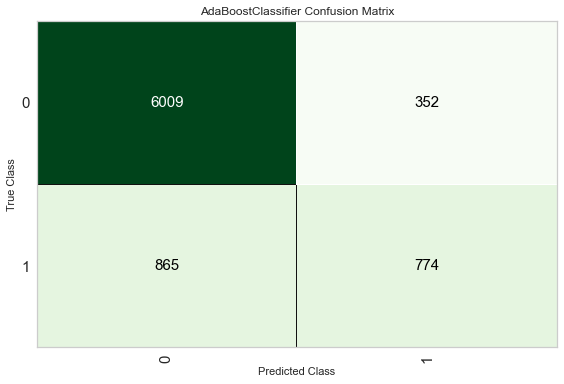

In [12]:
#plotting confusion matrix of Ada Boost Classifier (before tuned)
plot_model(ada, plot='confusion_matrix')

In [13]:
#Ada predicted very well when a client is not in churn (0), but in the opposite case (1), it predicted very poorly

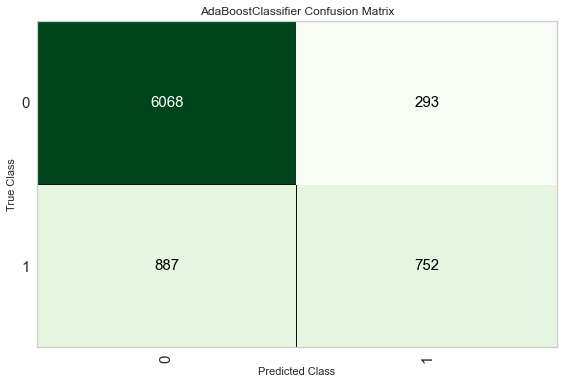

In [16]:
#plotting confusion matrix of Ada Boost Classifier (after tuned)
plot_model(tuned_ada, plot='confusion_matrix')

In [17]:
#as you can see, even after tunning ada, it didn't predict well. In fact, got worse

In [18]:
#checking exactly how many 1's and 0's there are on original dataset
print(sum(dataset['Exited']==1))
print(sum(dataset['Exited']==0))

2037
7963


In [19]:
#time to get a new train set, with 50% of 0's and 50% of 1's
#since there are a little more than 2000 1's, I will train half of it
ds1 = dataset.loc[dataset['Exited']==1][0:1000]
ds2 = dataset.loc[dataset['Exited']==0][0:1000]
ds3 = ds1.append(ds2)
ds3.shape

(2000, 14)

In [20]:
#train set has 2000 rows

In [21]:
#re-training
clf2 = setup(data = ds3, target = 'Exited',train_size=0.99, session_id=1, ignore_features=['RowNumber','CustomerId','Surname'] ,numeric_features=['Tenure','NumOfProducts'])

,Description,Value
0,session_id,1
1,Target,Exited
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(2000, 14)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [22]:
#comparing models once again
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7665,0.8591,0.7542,0.7770,0.7642,0.5332,0.5350,0.0790
rf,Random Forest Classifier,0.7570,0.8419,0.7289,0.7744,0.7498,0.5140,0.5163,0.1250
lightgbm,Light Gradient Boosting Machine,0.7559,0.8416,0.7421,0.7652,0.7526,0.5120,0.5133,0.0310
ada,Ada Boost Classifier,0.7549,0.8327,0.7430,0.7634,0.7524,0.5099,0.5110,0.0470
et,Extra Trees Classifier,0.7514,0.8323,0.7309,0.7646,0.7464,0.5028,0.5044,0.1010
ridge,Ridge Classifier,0.7074,0.0000,0.6965,0.7148,0.7048,0.4148,0.4157,0.0070
lda,Linear Discriminant Analysis,0.7074,0.7697,0.6965,0.7148,0.7048,0.4148,0.4157,0.0070
dt,Decision Tree Classifier,0.7049,0.7049,0.7057,0.7069,0.7055,0.4097,0.4106,0.0070
nb,Naive Bayes,0.6968,0.7440,0.6573,0.7162,0.6845,0.3937,0.3959,0.0060
lr,Logistic Regression,0.6443,0.6908,0.6572,0.6433,0.6494,0.2884,0.2893,0.0120


In [23]:
#Gradient Boosting Classifier was the best, it will be used

In [24]:
#now, using for predict, the rest of original dataset
ds4 = dataset.loc[dataset['Exited']==1][1000:]
ds5 = dataset.loc[dataset['Exited']==0][1000:]
ds6 = ds4.append(ds5)
ds6.shape

(8000, 14)

In [25]:
gbc = create_model('gbc')
tuned_gbc = tune_model(gbc, optimize = 'F1')
gbc_final = finalize_model(tuned_gbc)
predictions = predict_model(gbc_final, data = ds6)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8030,0.8846,0.7475,0.8409,0.7914,0.6061,0.6098
1,0.7475,0.8406,0.7374,0.7526,0.7449,0.4949,0.4951
2,0.7677,0.8244,0.7879,0.7573,0.7723,0.5354,0.5358
3,0.7929,0.8937,0.7879,0.7959,0.7919,0.5859,0.5859
4,0.7626,0.8541,0.8081,0.7407,0.7729,0.5253,0.5274
5,0.7576,0.8582,0.7374,0.7684,0.7526,0.5152,0.5156
6,0.7323,0.8045,0.7071,0.7447,0.7254,0.4646,0.4652
7,0.7071,0.7793,0.6500,0.7386,0.6915,0.4148,0.4179
8,0.7727,0.8628,0.7300,0.8022,0.7644,0.5458,0.5481
9,0.7919,0.8593,0.8586,0.7589,0.8057,0.5835,0.5886


In [45]:
evaluate_model(gbc_final)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

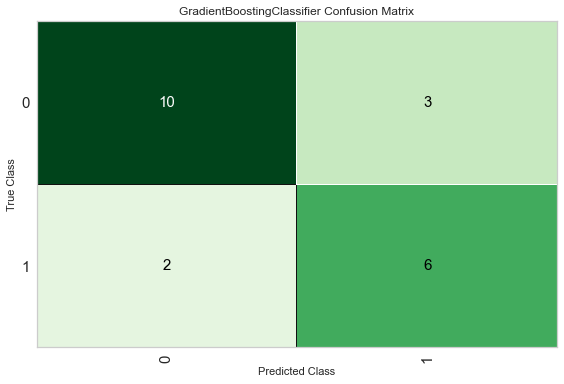

In [26]:
#plotting test set confusion matrix of our model after tunning 
plot_model(gbc_final, plot='confusion_matrix')

In [27]:
#plotting confusion matrix of all the rest of original dataset and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(predictions['Exited'], predictions['Label'])
print(cm)
accuracy_score(predictions['Exited'], predictions['Label'])

[[5375 1588]
 [ 263  774]]


0.768625

In [28]:
predictions

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Label,Score
4754,4755,15595592,Lai,708,France,Female,59,2,0.00,1,1,0,179673.11,1,1,0.9803
4756,4757,15778005,Kemp,785,France,Female,39,1,130147.98,1,1,0,163798.41,1,1,0.7640
4768,4769,15698528,Napolitani,599,Spain,Female,31,3,0.00,1,1,1,130086.47,1,0,0.8445
4779,4780,15711843,Pisani,613,Germany,Male,40,1,147856.82,3,0,0,107961.11,1,1,0.9604
4781,4782,15804131,Farmer,850,Spain,Female,53,7,65407.16,2,0,0,182633.63,1,1,0.7337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0,0,0.9214
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0,0,0.9327
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,0.8034
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,0.9010
